<a href="https://www.kaggle.com/code/gpreda/elon-musk-s-tweets?scriptVersionId=132421651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><h1>Elon Musk's Tweets</h1></center>

<br>

![](https://storage.googleapis.com/kaggle-datasets-images/2342642/4438151/919dc4a0c5b82411dcb1a7064b67855c/dataset-cover.png?t=2022-11-03-08-15-31)

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Prepare for data analysis</a>  
    - Load packages
    - Load data
- <a href='#3'>Data exploration</a>   
    - <a href='#31'>Glimpse the data</a> 
        - Missing data
        - Unique values
        - Most frequent values
    - <a href='#32'>Visualize the data distribution</a>  
        - User name
        - Tweet source
        - Text worldclouds
        - Last tweets texts
    - <a href='#33'>Time variation</a> 
        - Extract time features
        - Time variable features
        - Last tweets texts, including time            
        - Prevalent words grouped by user description
        - Tweets per day of week, hour, minute
    - <a href='#34'>Sentiment analysis</a>   

   

# <a id='1'>Introduction</a>

The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.  It represents the tweets written by Elon Musk, one of the most active and followed users from Twitter.


# <a id='2'>Prepare for data analysis</a>

## Load packages

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import cv2
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

## Load data

In [2]:
tweets_df = pd.read_csv("../input/elon-musk-tweets/elon_musk_tweets.csv")

# <a id='3'>Data exploration</a>




## <a id='31'>Glimpse the data</a>

In [3]:
print(f"data shape: {tweets_df.shape}")

data shape: (5682, 16)


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5682 non-null   int64 
 1   user_name         5682 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1577 non-null   object
 4   user_created      5682 non-null   object
 5   user_followers    5682 non-null   int64 
 6   user_friends      5682 non-null   int64 
 7   user_favourites   5682 non-null   int64 
 8   user_verified     5682 non-null   bool  
 9   date              5682 non-null   object
 10  text              5682 non-null   object
 11  hashtags          2 non-null      object
 12  source            5682 non-null   object
 13  retweets          5682 non-null   int64 
 14  favorites         5682 non-null   int64 
 15  is_retweet        5682 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 632.7+ KB


In [5]:
tweets_df.describe()

id  user_followers  user_friends  user_favourites  \
count  5.682000e+03    5.682000e+03   5682.000000      5682.000000   
mean   1.616143e+18    1.258300e+08    187.384196     18434.532207   
std    3.172003e+16    1.157819e+07     62.707568      3449.080009   
min    1.544317e+18    1.012408e+08    115.000000     13503.000000   
25%    1.593456e+18    1.191007e+08    130.000000     15335.000000   
50%    1.617274e+18    1.278051e+08    177.000000     17598.000000   
75%    1.645169e+18    1.356224e+08    230.000000     21386.000000   
max    1.665590e+18    1.422256e+08    320.000000     24972.000000   

            retweets     favorites  
count    5682.000000  5.682000e+03  
mean     5611.371172  6.526968e+04  
std     14646.620021  1.344559e+05  
min         0.000000  5.200000e+01  
25%       364.000000  6.210250e+03  
50%      1128.000000  1.890750e+04  
75%      4336.000000  6.102775e+04  
max    359672.000000  2.500167e+06

In [6]:
tweets_df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [7]:
tweets_df.tail()

id  user_name user_location    user_description  \
5677  1662485396213710849  Elon Musk           NaN  handsome/brilliant   
5678  1662484118058291206  Elon Musk           NaN  handsome/brilliant   
5679  1662481701413572610  Elon Musk           NaN  handsome/brilliant   
5680  1662473249614180356  Elon Musk           NaN  handsome/brilliant   
5681  1662292194672230400  Elon Musk           NaN  handsome/brilliant   

                   user_created  user_followers  user_friends  \
5677  2009-06-02 20:12:29+00:00       142225586           320   
5678  2009-06-02 20:12:29+00:00       142225586           320   
5679  2009-06-02 20:12:29+00:00       142225586           320   
5680  2009-06-02 20:12:29+00:00       142225586           320   
5681  2009-06-02 20:12:29+00:00       142225586           320   

      user_favourites  user_verified                       date  \
5677            24972          False  2023-05-27 15:46:20+00:00   
5678            24972          False  2023-05-27 15:41:15+00:00   
5679            24972          False  2023-05-27 15:31:39+00:00   
5680            24972          False  2023-05-27 14:58:04+00:00   
5681            24972          False  2023-05-27 02:58:37+00:00   

                                                   text hashtags  \
5677                      @NotlouisCk Sounds reasonable      NaN   
5678                                        @paulg True      NaN   
5679                                @jamesdouma Correct      NaN   
5680                               @WallStreetSilv Many      NaN   
5681  @davidmweissman @Target Maybe it’s not true, h...      NaN   

                  source  retweets  favorites  is_retweet  
5677  Twitter for iPhone       316      13613       False  
5678  Twitter for iPhone       117       2117       False  
5679  Twitter for iPhone        80       1909       False  
5680  Twitter for iPhone       351       4672       False  
5681  Twitter for iPhone       676      42056       False

### Import utility scripts

In [8]:
from data_quality_stats import missing_data, unique_values, most_frequent_values

### Missing data

In [9]:
missing_data(tweets_df)

id user_name user_location user_description user_created  \
Total        0         0          4632             4105            0   
Percent    0.0       0.0     81.520591        72.245688          0.0   
Types    int64    object        object           object       object   

        user_followers user_friends user_favourites user_verified    date  \
Total                0            0               0             0       0   
Percent            0.0          0.0             0.0           0.0     0.0   
Types            int64        int64           int64          bool  object   

           text   hashtags  source retweets favorites is_retweet  
Total         0       5680       0        0         0          0  
Percent     0.0  99.964801     0.0      0.0       0.0        0.0  
Types    object     object  object    int64     int64       bool

### Unique values

In [10]:
unique_values(tweets_df)

id  user_name  user_location  user_description  user_created  \
Total    5682       5682           1050              1577          5682   
Uniques  5682          2              6                 7             1   

         user_followers  user_friends  user_favourites  user_verified  date  \
Total              5682          5682             5682           5682  5682   
Uniques             638            96              313              2  5682   

         text  hashtags  source  retweets  favorites  is_retweet  
Total    5682         2    5682      5682       5682        5682  
Uniques  5618         2       2      3428       5417           1

### Most frequent values

In [11]:
most_frequent_values(tweets_df)

id  user_name user_location  \
Total                              5682       5682          1050   
Most frequent item  1544379368478212100  Elon Musk     Trøllheim   
Frequence                             1       5603           381   
Percent from total                0.018      98.61        36.286   

                   user_description               user_created user_followers  \
Total                          1577                       5682           5682   
Most frequent item          nothing  2009-06-02 20:12:29+00:00      142225611   
Frequence                       616                       5682             60   
Percent from total           39.062                      100.0          1.056   

                   user_friends user_favourites user_verified  \
Total                      5682            5682          5682   
Most frequent item          122           24972          True   
Frequence                   345             177          4067   
Percent from total        6.072           3.115        71.577   

                                         date                    text  \
Total                                    5682                    5682   
Most frequent item  2022-07-05 17:55:09+00:00  @WholeMarsBlog Exactly   
Frequence                                   1                       5   
Percent from total                      0.018                   0.088   

                          hashtags              source retweets favorites  \
Total                            2                5682     5682      5682   
Most frequent item  ['FreeSpeech']  Twitter for iPhone      248      1746   
Frequence                        1                5627       12         3   
Percent from total            50.0              99.032    0.211     0.053   

                   is_retweet  
Total                    5682  
Most frequent item      False  
Frequence                5682  
Percent from total      100.0

## <a id='32'>Visualize the data distribution</a>

In [12]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette="Set3")
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

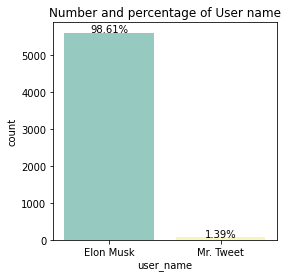

In [13]:
plot_count("user_name", "User name", tweets_df,1)

### Tweet source

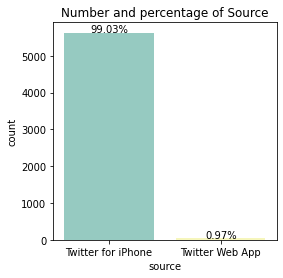

In [14]:
plot_count("source", "Source", tweets_df,1)

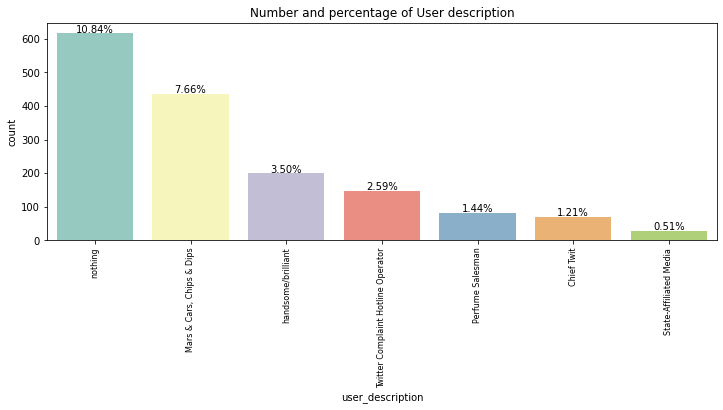

In [15]:
plot_count("user_description", "User description", tweets_df,3)

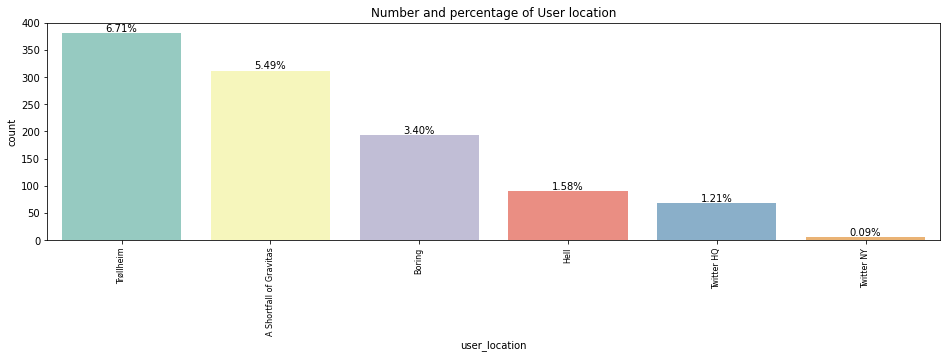

In [16]:
plot_count("user_location", "User location", tweets_df,4)

In [17]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(12, 16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    
    
    

### Text wordcloauds

In [18]:
mask_file = cv2.imread("/kaggle/input/wordcloud-masks/twitter_logo_mask.png")

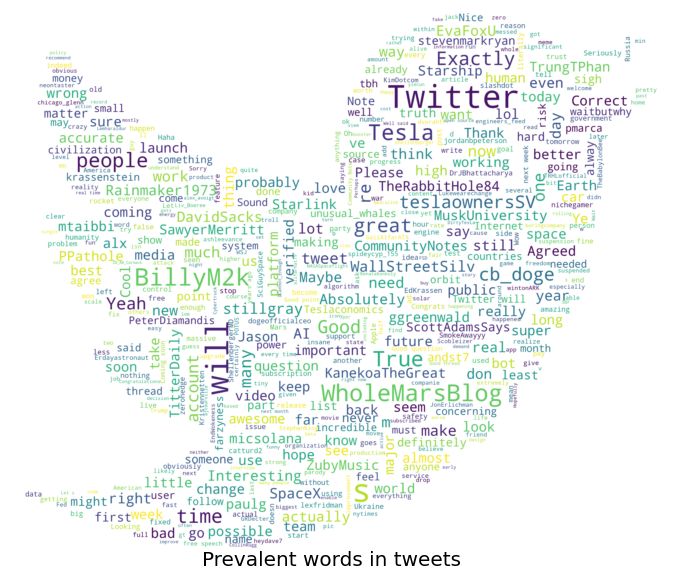

In [19]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets', mask=mask_file)

### Last tweets texts

In [20]:
pd.set_option('display.max_colwidth', -1)
tweets_df[['text']].tail(20)

text
5662  @gmoneyNFT Nice                                                                     
5663  Sorry this app takes up so much space https://t.co/bCCfcOhNJt                       
5664  @WholeMarsBlog 🤣🤣 chief troll officer at ur service                                 
5665  AI Fashion Show in Azkaban\nDate &amp; Details to Follow                            
5666  @RealJamesWoods On Twitter, I mean                                                  
5667  @RealJamesWoods Jack is back                                                        
5668  Office Space is an awesome movie                                                    
5669  @LibertyCappy A real problem!                                                       
5670  Previously, I had thought it was some pescatarian conspiracy theory, but nope       
5671  I was today’s years old when I learned that some people genuinely love cooked salmon
5672  @zerohedge We are insulated from this in the west                                   
5673  @zerohedge Ever?                                                                    
5674  @RealJamesWoods Not sure why this happened                                          
5675  @ylecun Just tap the button for FSD Beta                                            
5676  @andst7 Perspective                                                                 
5677  @NotlouisCk Sounds reasonable                                                       
5678  @paulg True                                                                         
5679  @jamesdouma Correct                                                                 
5680  @WallStreetSilv Many                                                                
5681  @davidmweissman @Target Maybe it’s not true, hence the question

## <a id="33">Time variation</a>

### Extract date and time features

In [21]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [22]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [23]:
tweets_df["user_description"] = tweets_df["user_description"].fillna("None")

### Time variable features

In [24]:
tweets_agg_df = tweets_df.groupby(["date_only", 'user_description'])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", 'user_description', "count"]

In [25]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df, marker='o', linestyle='--')
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

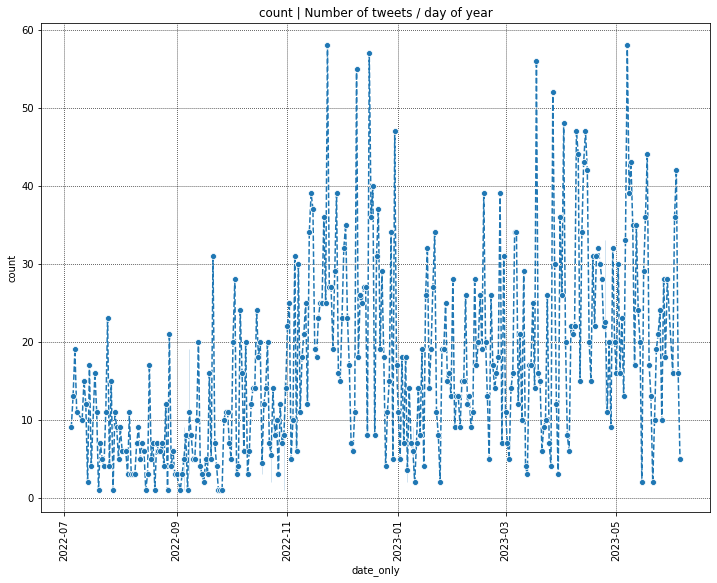

In [26]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

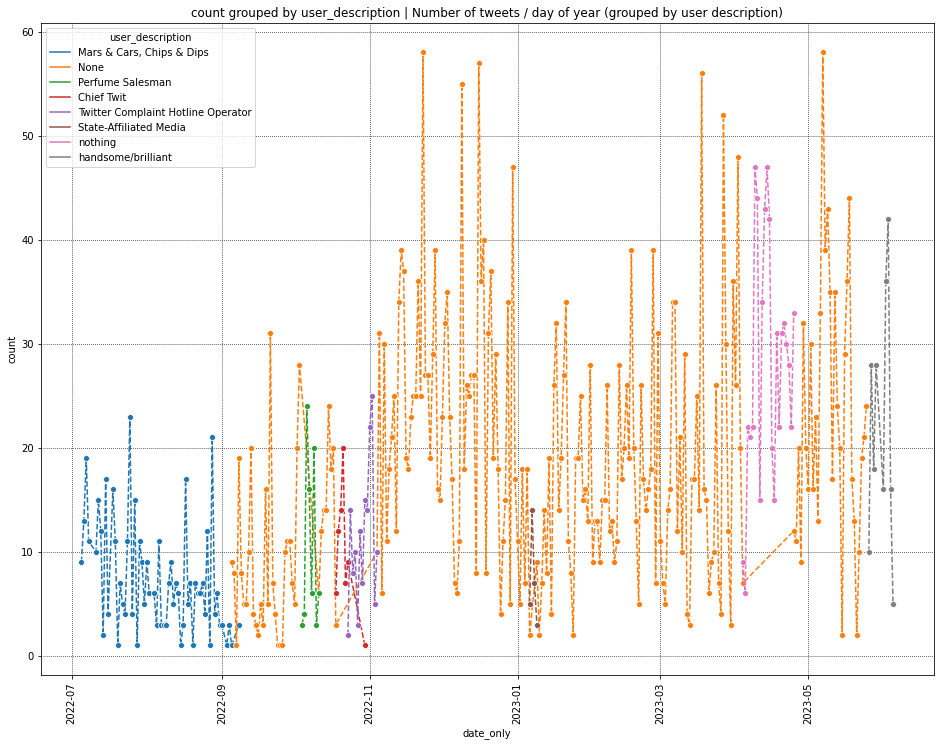

In [27]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year (grouped by user description)",hue='user_description', size=4)

In [28]:
tweets_agg_df = tweets_df.groupby(["date_only"])["user_followers"].max().reset_index()
tweets_agg_df.columns = ["date_only", "followers"]

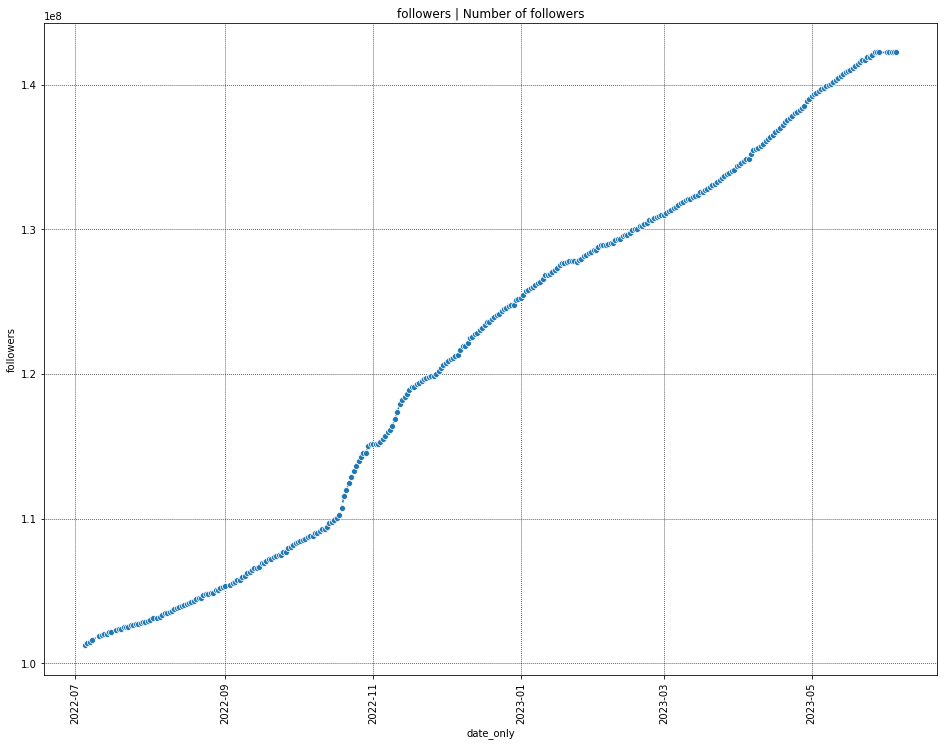

In [29]:
plot_time_variation(tweets_agg_df, y='followers', title="Number of followers", size=4)

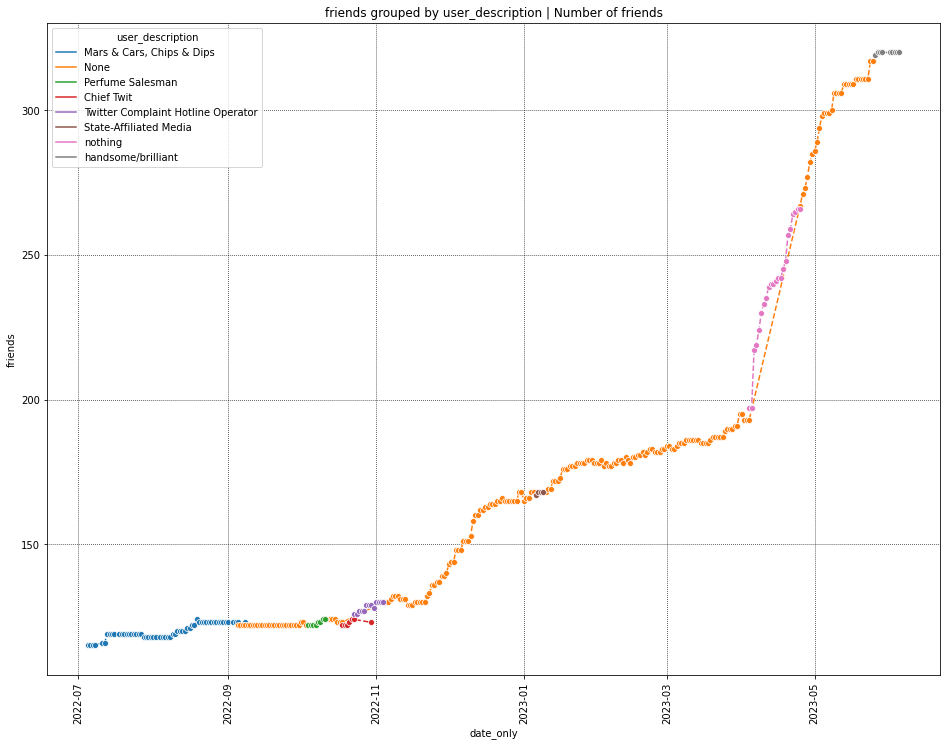

In [30]:
tweets_agg_df = tweets_df.groupby(["date_only", "user_description"])["user_friends"].max().reset_index()
tweets_agg_df.columns = ["date_only", "user_description", "friends"]
plot_time_variation(tweets_agg_df, y='friends', hue='user_description', title="Number of friends", size=4)

### Last tweets texts, including time

In [31]:
tweets_df[["date", "month", "day", "hour", "text"]].sort_values(["date"], ascending=True).tail(20)

date  month  day  hour  \
5524  2023-06-04 13:20:05+00:00  6      4    13     
5523  2023-06-04 14:01:27+00:00  6      4    14     
5522  2023-06-04 14:08:27+00:00  6      4    14     
5521  2023-06-04 14:16:53+00:00  6      4    14     
5520  2023-06-04 14:19:28+00:00  6      4    14     
5519  2023-06-04 14:40:50+00:00  6      4    14     
5518  2023-06-04 14:42:14+00:00  6      4    14     
5517  2023-06-04 14:46:19+00:00  6      4    14     
5516  2023-06-04 18:59:38+00:00  6      4    18     
5515  2023-06-04 19:08:46+00:00  6      4    19     
5514  2023-06-04 19:16:26+00:00  6      4    19     
5513  2023-06-04 19:18:34+00:00  6      4    19     
5512  2023-06-04 19:20:10+00:00  6      4    19     
5511  2023-06-04 19:44:21+00:00  6      4    19     
5510  2023-06-04 23:53:20+00:00  6      4    23     
5509  2023-06-05 00:19:29+00:00  6      5    0      
5508  2023-06-05 00:29:33+00:00  6      5    0      
5507  2023-06-05 00:49:09+00:00  6      5    0      
5506  2023-06-05 05:16:15+00:00  6      5    5      
5505  2023-06-05 05:24:45+00:00  6      5    5      

                                                                                                                                              text  
5524  @SmokeAwayyy Money is just information                                                                                                        
5523  @TheBabylonBee Worked like a charm 💫                                                                                                          
5522  @LibertyCappy Interesting                                                                                                                     
5521  @jordanbpeterson @BlackRock Major problem                                                                                                     
5520  @jordanbpeterson “gender-affirming care for minors” is pure evil                                                                              
5519  Hosting @RobertKennedyJr’s upcoming Space https://t.co/pJr78Q7qAr                                                                             
5518  @MuskUniversity Let that sink in                                                                                                              
5517  @EndWokeness Not oppressed                                                                                                                    
5516  @TheBabylonBee Works every time                                                                                                               
5515  @farzyness Exactly                                                                                                                            
5514  @fentasyl True                                                                                                                                
5513  @ToscaMusk @TheBabylonBee Of course kyc                                                                                                       
5512  @TheRabbitHole84 It means castration                                                                                                          
5511  @fentasyl Who does control them?                                                                                                              
5510  @PeterDiamandis I don’t mean to suggest a headlong rush into AGI without considering the consequences                                         
5509  @VinceWaelti @Starlink Sounds like we’re messing up in multiple ways here and not enabling a way to clear things up… https://t.co/yF7vzJr6Ys  
5508  @stevenmarkryan Yeah, extremely brittle to local conditions &amp; doesn’t scale                                                               
5507  @VigilantFox Really                                                                                                                           
5506  @TexasLindsay_ Concerning                                                   

In [32]:
user_description_list = tweets_df['user_description'].unique()
print(user_description_list)

['Mars & Cars, Chips & Dips' 'None' 'Perfume Salesman' 'Chief Twit'
 'Twitter Complaint Hotline Operator' 'State-Affiliated Media' 'nothing'
 'handsome/brilliant']


### Prevalent words grouped by user description 

Because the user description is changing in time, this is actually as well a time variable content.

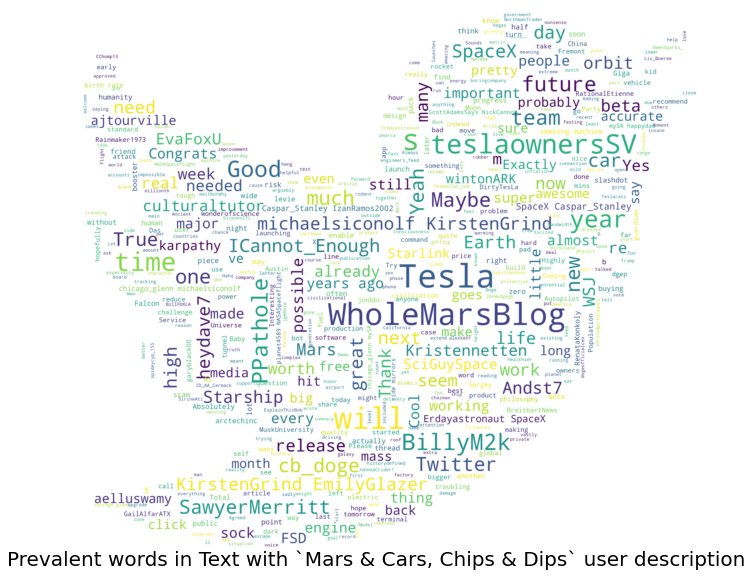

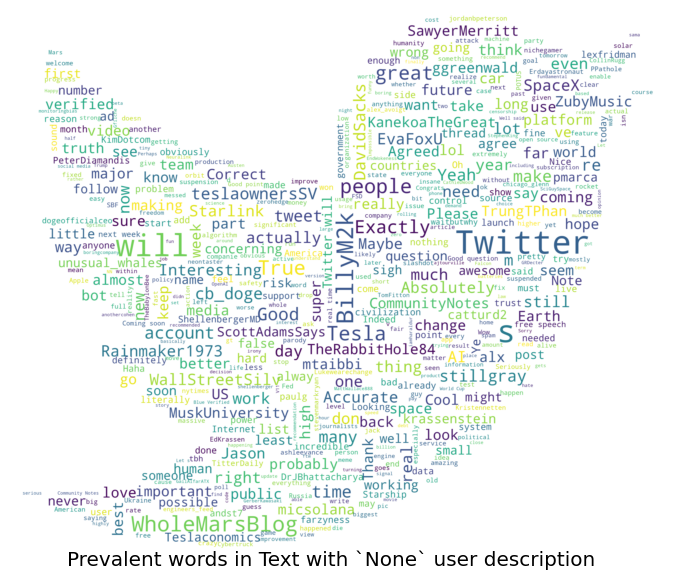

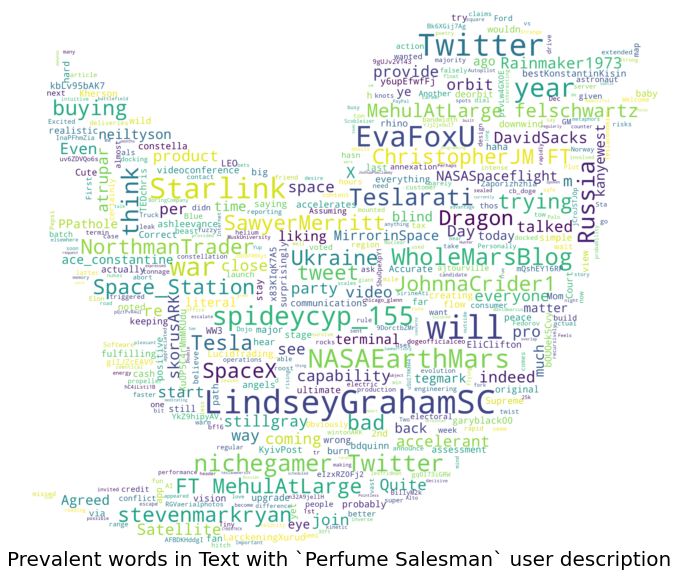

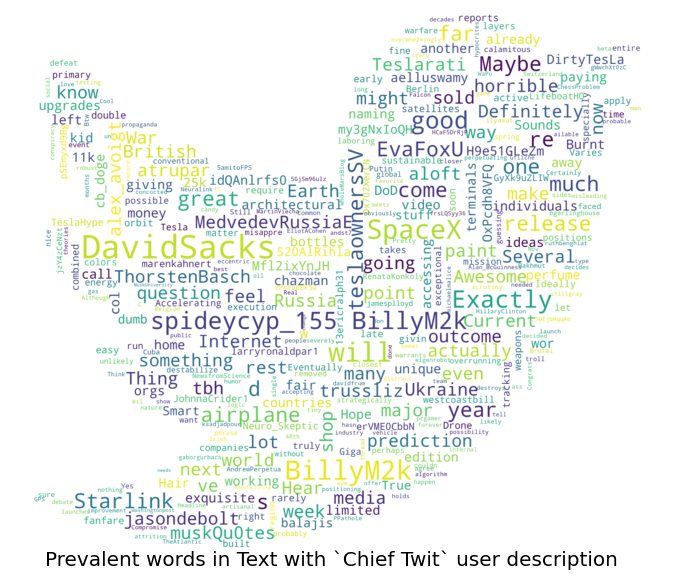

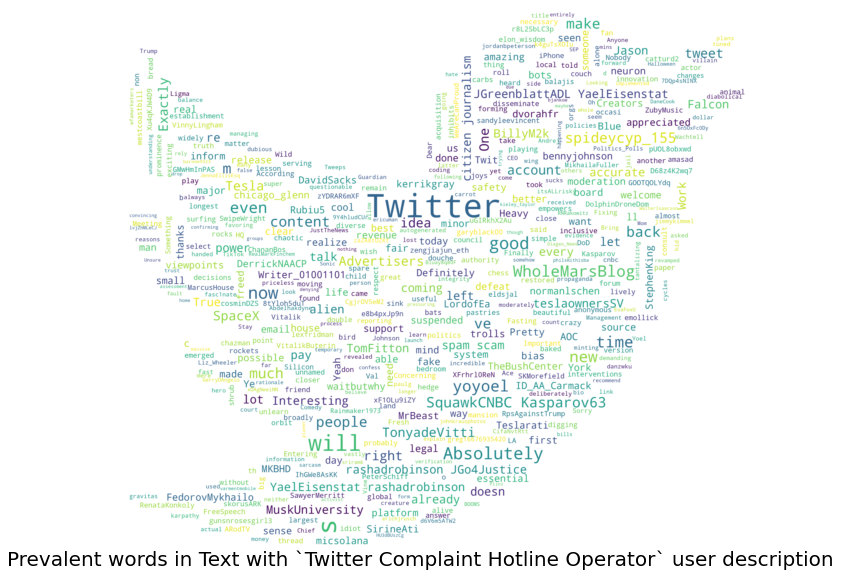

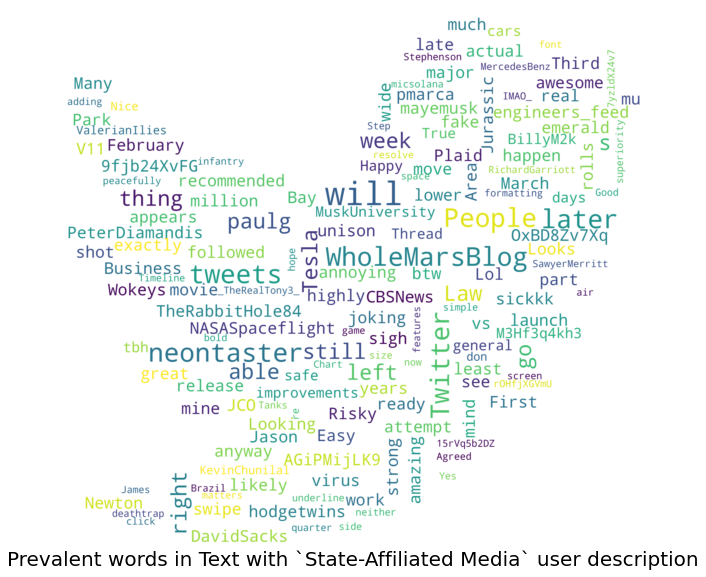

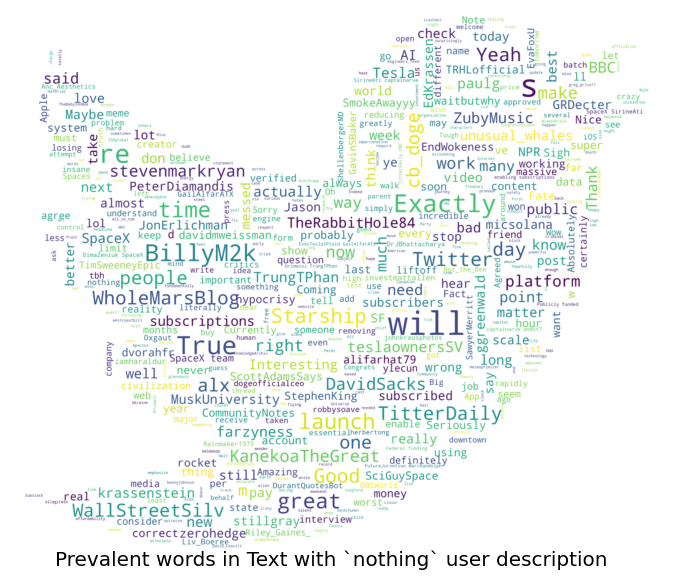

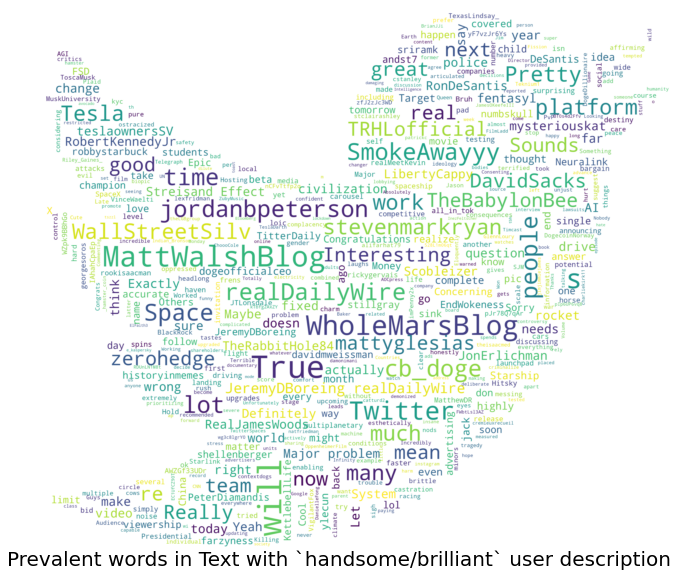

In [33]:
for us_ds in user_description_list:
    show_wordcloud(tweets_df.loc[tweets_df['user_description']==us_ds, 'text'], 
                   title = f'Prevalent words in Text with `{us_ds}` user description', 
                   mask=mask_file)

### Tweets per day of week, hour, minute 

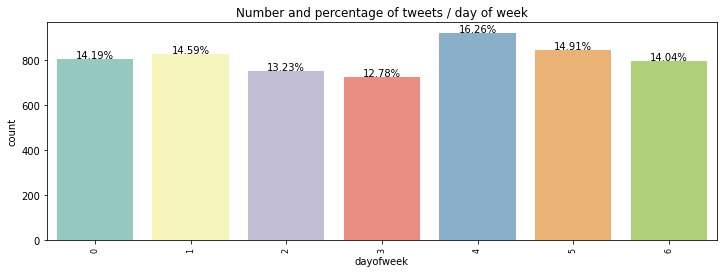

In [34]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

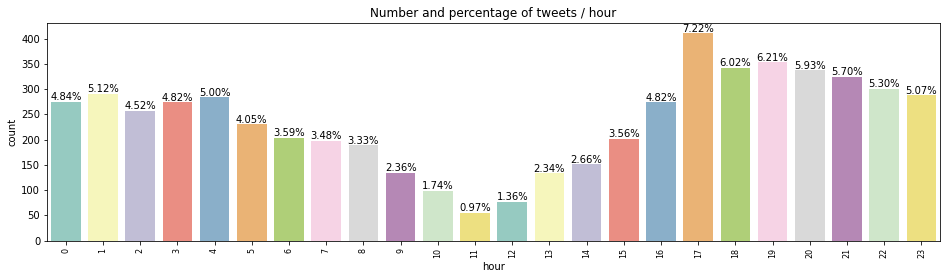

In [35]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

Apparently Elon only stops 2-3 hours / day. International travel and aids posting on his hehalf might change the real distribution.

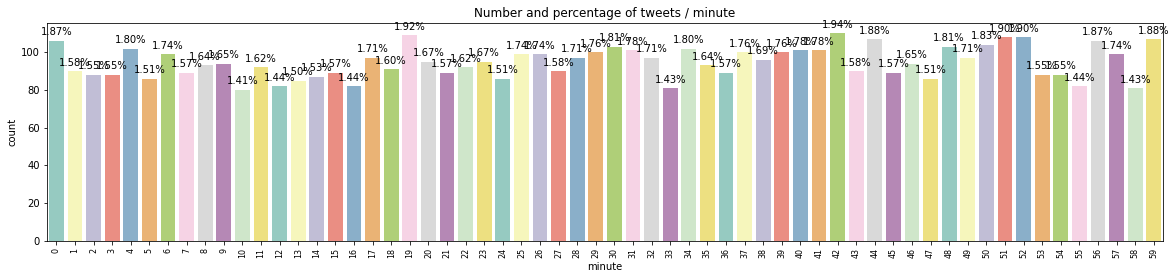

In [36]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

## <a id="34">Sentiment Analysis</a>

In [37]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [38]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

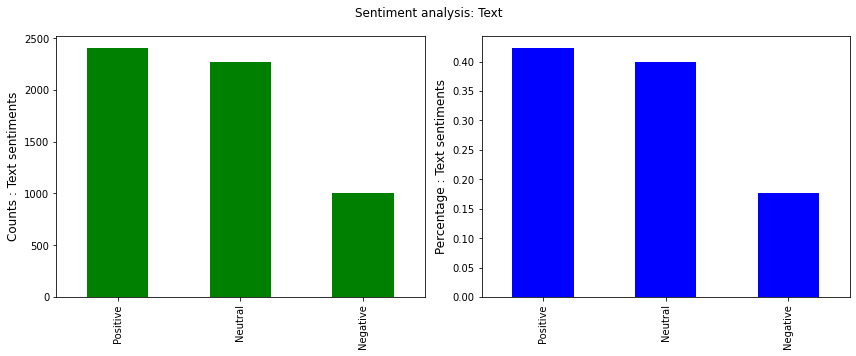

In [39]:
tweets_df['text_sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'text_sentiment', 'Text')

The tone of Elon's tweets is mostly neutral or positive. 

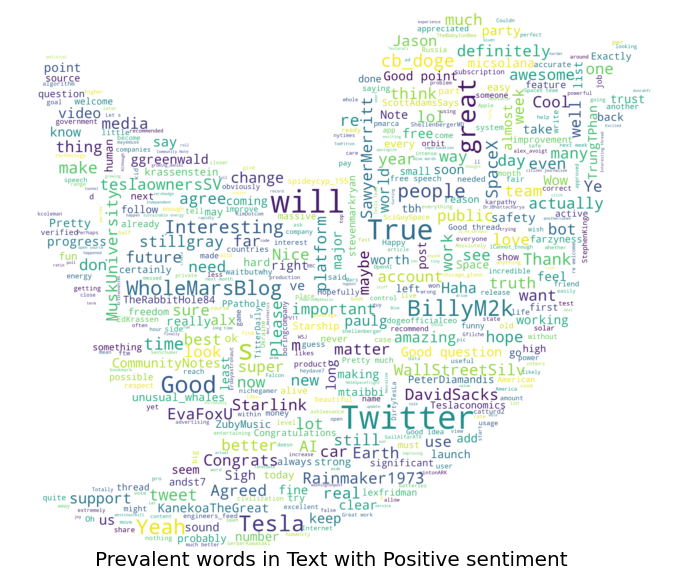

In [40]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Positive", 'text'], 
               title = 'Prevalent words in Text with Positive sentiment', 
               mask=mask_file)

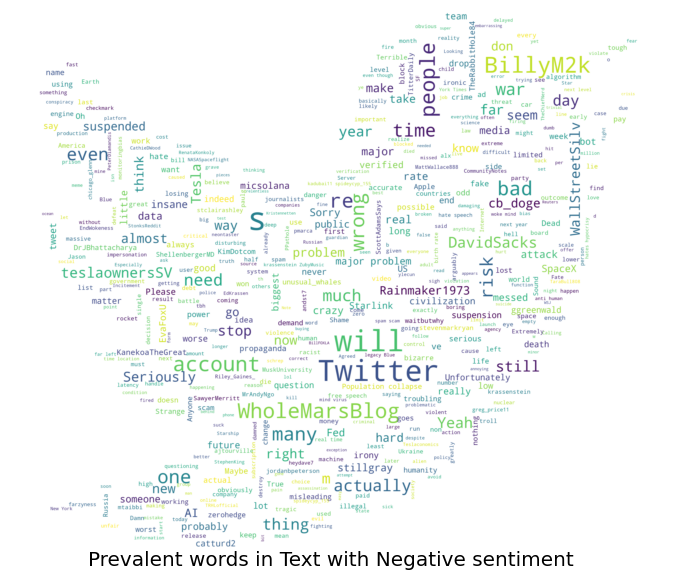

In [41]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Negative", 'text'], 
               title = 'Prevalent words in Text with Negative sentiment', 
               mask=mask_file)

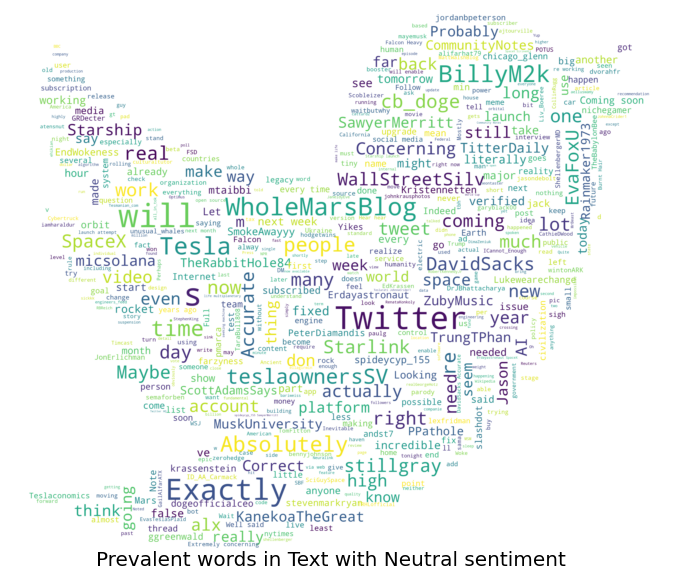

In [42]:
show_wordcloud(tweets_df.loc[tweets_df['text_sentiment']=="Neutral", 'text'], 
               title = 'Prevalent words in Text with Neutral sentiment', 
               mask=mask_file)